## Hyperparameter Tuning Notebook File

## Cloning Project From GitHub Repository

To begin the hyperparmeter tuning process we need to clone the repository into the local Google Colab filesystem.

In [ ]:
!git clone --recurse-submodules https://github.com/aiden-dm/Unlearning-MIA-Eval.git

Cloning into 'Unlearning-MIA-Eval'...
remote: Enumerating objects: 413, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 413 (delta 28), reused 28 (delta 14), pack-reused 366 (from 1)
Receiving objects: 100% (413/413), 249.40 MiB | 48.12 MiB/s, done.
Resolving deltas: 100% (253/253), done.
Updating files: 100% (20/20), done.
Submodule 'Third_Party_Code/BadTeach' (https://github.com/aiden-dm/bad-teaching-unlearning) registered for path 'Third_Party_Code/BadTeach'
Submodule 'Third_Party_Code/SCRUB' (https://github.com/aiden-dm/SCRUB) registered for path 'Third_Party_Code/SCRUB'
Submodule 'Third_Party_Code/SSD' (https://github.com/aiden-dm/selective-synaptic-dampening) registered for path 'Third_Party_Code/SSD'
Cloning into '/content/Unlearning-MIA-Eval/Third_Party_Code/BadTeach'...
remote: Enumerating objects: 69, done.        
remote: Counting objects: 100% (69/69), done.        
remote: Compressing objects: 100% (64/64),

This can be used to delete the local copy of the repository, in the case it needs to be changed or re-cloned.

In [ ]:
!rm -rf /content/Unlearning-MIA-Eval

You need to run the following code to add the /content/Unlearning-MIA-Eval/ directory to Python's module search path so you can import local files from the unlearning framework as if they were installed packages.

In [ ]:
import sys

# Adding the local files to the system path
sys.path.append('/content/Unlearning-MIA-Eval/')

## Getting Data Loaders

The following code fetches all of the dataloaders that will be used. The dataset is CIFAR-10.

In [ ]:
from Final_Structure.datasets import get_loaders

# Getting all the loaders
ROOT_PATH = '/content/Unlearning-MIA-Eval/Final_Structure/data'
FORGET_CLASSES = [1]
SEED = 2
DATASET = "cifar10"
loaders = get_loaders(root=ROOT_PATH, dataset=DATASET, forget_classes=FORGET_CLASSES, seed=SEED)

# Extracting the loaders we need
train_loader = loaders[0]
valid_loader = loaders[1]
test_loader = loaders[2]
train_forget_loader = loaders[3]
train_retain_loader = loaders[4]
valid_forget_loader = loaders[5]
valid_retain_loader = loaders[6]
test_forget_loader = loaders[7]
test_retain_loader = loaders[8]

100%|██████████| 170M/170M [00:03<00:00, 47.5MB/s]


## Training and Unlearning

### Training ResNet18 on Full Training Set

The following code trains a ResNet18 model on two datasets:

1. Full train dataset
2. Retain dataset (the dataset that does not contain the classes we intend to forget)

In [ ]:
import torch
import torch.nn as nn
from Final_Structure.training import get_resnet_model, train

# Changing number of epochs depending on dataset
if DATASET == "cifar10":
    epochs = 45
else:
    epochs = 65

# Defining parameters for training
model = get_resnet_model(dataset=DATASET)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.1, patience=5, verbose=True
)
save_path = "/content/Unlearning-MIA-Eval/resnet_full.pt"

# Training the model
train(model, train_loader, criterion, optimizer, epochs=epochs, scheduler=scheduler, save_path=save_path)

Starting Epoch [1/45]...


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/45], Loss: 1.5431, Accuracy: 0.4420
Starting Epoch [2/45]...
Epoch [2/45], Loss: 1.2214, Accuracy: 0.5620
Starting Epoch [3/45]...
Epoch [3/45], Loss: 1.0631, Accuracy: 0.6193
Starting Epoch [4/45]...
Epoch [4/45], Loss: 0.9617, Accuracy: 0.6594
Starting Epoch [5/45]...
Epoch [5/45], Loss: 0.9008, Accuracy: 0.6847
Starting Epoch [6/45]...
Epoch [6/45], Loss: 0.8433, Accuracy: 0.7004
Starting Epoch [7/45]...
Epoch [7/45], Loss: 0.7830, Accuracy: 0.7246
Starting Epoch [8/45]...
Epoch [8/45], Loss: 0.7451, Accuracy: 0.7370
Starting Epoch [9/45]...
Epoch [9/45], Loss: 0.7113, Accuracy: 0.7494
Starting Epoch [10/45]...
Epoch [10/45], Loss: 0.6783, Accuracy: 0.7593
Starting Epoch [11/45]...
Epoch [11/45], Loss: 0.6493, Accuracy: 0.7720
Starting Epoch [12/45]...
Epoch [12/45], Loss: 0.6260, Accuracy: 0.7831
Starting Epoch [13/45]...
Epoch [13/45], Loss: 0.6036, Accuracy: 0.7880
Starting Epoch [14/45]...
Epoch [14/45], Loss: 0.5730, Accuracy: 0.7992
Starting Epoch [15/45]...
Epoch [15

### Training ResNet18 on Train Retain Set

In [ ]:
import torch
import torch.nn as nn
from Final_Structure.training import get_resnet_model, train

# Changing number of epochs depending on dataset
if DATASET == "cifar10":
    epochs = 45
else:
    epochs = 65

# Defining parameters for training
model = get_resnet_model(dataset=DATASET)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.1, patience=5, verbose=True
)
save_path = "/content/Unlearning-MIA-Eval/retain_model.pt"

# Training the model
train(model, train_retain_loader, criterion, optimizer, epochs=epochs, scheduler=scheduler, save_path=save_path)

Starting Epoch [1/45]...
Epoch [1/45], Loss: 1.4723, Accuracy: 0.4592
Starting Epoch [2/45]...
Epoch [2/45], Loss: 1.1435, Accuracy: 0.5881
Starting Epoch [3/45]...
Epoch [3/45], Loss: 0.9972, Accuracy: 0.6413
Starting Epoch [4/45]...
Epoch [4/45], Loss: 0.9073, Accuracy: 0.6752
Starting Epoch [5/45]...
Epoch [5/45], Loss: 0.8391, Accuracy: 0.7012
Starting Epoch [6/45]...
Epoch [6/45], Loss: 0.7788, Accuracy: 0.7244
Starting Epoch [7/45]...
Epoch [7/45], Loss: 0.7317, Accuracy: 0.7414
Starting Epoch [8/45]...
Epoch [8/45], Loss: 0.6972, Accuracy: 0.7546
Starting Epoch [9/45]...
Epoch [9/45], Loss: 0.6696, Accuracy: 0.7626
Starting Epoch [10/45]...
Epoch [10/45], Loss: 0.6338, Accuracy: 0.7756
Starting Epoch [11/45]...
Epoch [11/45], Loss: 0.6094, Accuracy: 0.7861
Starting Epoch [12/45]...
Epoch [12/45], Loss: 0.5829, Accuracy: 0.7953
Starting Epoch [13/45]...
Epoch [13/45], Loss: 0.5593, Accuracy: 0.8021
Starting Epoch [14/45]...
Epoch [14/45], Loss: 0.5441, Accuracy: 0.8069
Starting E

### Performing SCRUB Unlearning

The following allows us to run the SCRUB unlearning algorithm with some modifiable hyperparameters.

In [ ]:
from types import SimpleNamespace

# Defining the args namespace
args = SimpleNamespace()

# Hyperparameters
args.epochs = 15
args.learning_rate = 0.0001
args.msteps = 10           # Unlearning is performed from epoch 0-msteps (inclusive)
args.t_opt_gamma = 1        # Keep this
args.t_opt_alpha = 0.0      # Focus on CE loss (hard unlearning)
args.kd_T = 2               # KL divergence temperature
args.check_path = '/content/Unlearning-MIA-Eval/scrub.pt'
args.print_accuracies = True
args.dataset = DATASET

In [ ]:
from Final_Structure.scrub import scrub
from Final_Structure.training import load_model

# Train the scrub unlearning model
full_path = '/content/Unlearning-MIA-Eval/resnet_full.pt'
scrub_model, scrub_history = scrub(full_path, loaders, args)

Epoch 1: maximize loss: 0.00, minimize loss: 0.00, train_acc: 0
   tr_acc: 91.64888888888889
   tf_acc: 85.26
   vr_acc: 83.36300912530604
   vf_acc: 79.58579881656804
Epoch 2: maximize loss: 0.00, minimize loss: 0.00, train_acc: 0
   tr_acc: 91.55555555555556
   tf_acc: 7.3
   vr_acc: 84.08635655464055
   vf_acc: 7.790927021696253
Epoch 3: maximize loss: 0.00, minimize loss: 0.00, train_acc: 0
   tr_acc: 90.60888888888888
   tf_acc: 0.02
   vr_acc: 83.9862007567327
   vf_acc: 0.0
Epoch 4: maximize loss: 0.00, minimize loss: 0.00, train_acc: 0
   tr_acc: 89.49333333333334
   tf_acc: 0.0
   vr_acc: 83.32962385933675
   vf_acc: 0.0
Epoch 5: maximize loss: 0.00, minimize loss: 0.00, train_acc: 0
   tr_acc: 89.65333333333334
   tf_acc: 0.0
   vr_acc: 82.94012908969508
   vf_acc: 0.0
Epoch 6: maximize loss: 0.00, minimize loss: 0.00, train_acc: 0
   tr_acc: 89.1288888888889
   tf_acc: 0.0
   vr_acc: 83.26285332739818
   vf_acc: 0.0
Epoch 7: maximize loss: 0.00, minimize loss: 0.00, train_ac

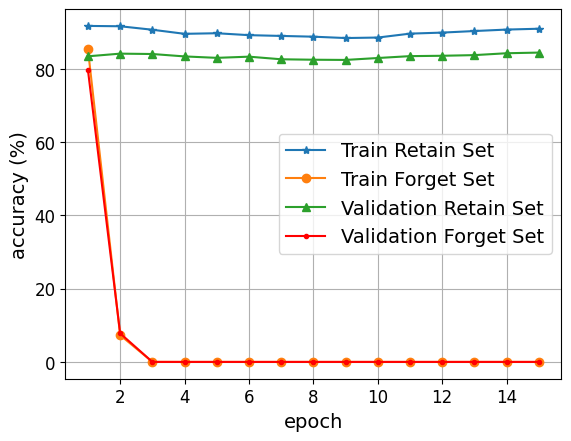

In [ ]:
from Final_Structure.evaluate import plot_tuning_accs

plot_tuning_accs(scrub_history)

### Performing Bad Teach Unlearning

The following allows us to run the Bad Teach unlearning algorithm with some modifiable hyperparameters.


In [ ]:
from types import SimpleNamespace

# Defining the args namespace
args = SimpleNamespace()

# Hyperparameters
args.epochs = 7
args.learning_rate = 0.0001
args.KL_temperature = 4
args.batch_size = 256
args.check_path = '/content/Unlearning-MIA-Eval/badt.pt'
args.print_accuracies = True
args.dataset = DATASET

In [ ]:
from Final_Structure.badt import badt
from Final_Structure.training import load_model

# Train the scrub unlearning model
full_path = '/content/Unlearning-MIA-Eval/resnet_full.pt'
badt_model, badt_history = badt(full_path, loaders, args)

Epoch 1 Unlearning Loss 0.0034446450881659985
   tr_acc: 89.73555555555555
   tf_acc: 32.54
   vr_acc: 81.78277320275986
   vf_acc: 31.45956607495069
Epoch 2 Unlearning Loss 0.001268376363441348
   tr_acc: 89.77777777777777
   tf_acc: 17.9
   vr_acc: 81.31537947918986
   vf_acc: 16.86390532544379
Epoch 3 Unlearning Loss 0.0009080077288672328
   tr_acc: 90.02888888888889
   tf_acc: 5.22
   vr_acc: 82.07211217449365
   vf_acc: 4.339250493096647
Epoch 4 Unlearning Loss 0.0007775190169923007
   tr_acc: 89.89111111111112
   tf_acc: 6.34
   vr_acc: 82.150011128422
   vf_acc: 5.9171597633136095
Epoch 5 Unlearning Loss 0.0006721300887875259
   tr_acc: 90.00666666666666
   tf_acc: 4.02
   vr_acc: 81.99421322056533
   vf_acc: 3.4516765285996054
Epoch 6 Unlearning Loss 0.0006183295627124608
   tr_acc: 89.72888888888889
   tf_acc: 3.94
   vr_acc: 81.14845314934342
   vf_acc: 2.8599605522682445
Epoch 7 Unlearning Loss 0.0005815921467728913
   tr_acc: 89.84222222222222
   tf_acc: 3.48
   vr_acc: 81.

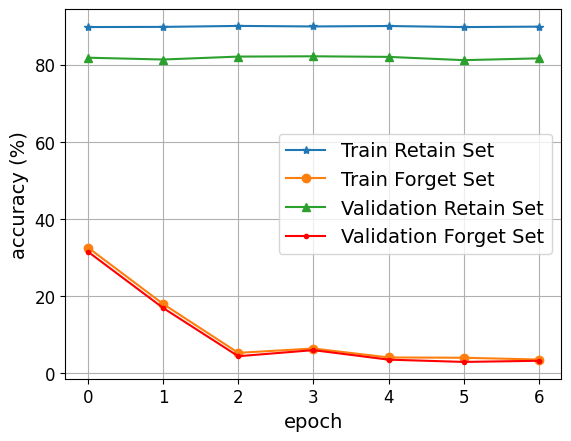

In [ ]:
from Final_Structure.evaluate import plot_tuning_accs

plot_tuning_accs(badt_history)

### Performing Selective Synaptic Dampening Unlearning

The following allows us to run the SSD unlearning algorithm with some modifiable hyperparameters.

In [ ]:
from types import SimpleNamespace

# Defining the args namespace
args = SimpleNamespace()

# Hyperparameters
args.learning_rate = 0.001      # Doesn't impact unlearning
args.dampening_constant = 10    # Parameter used in the paper
args.selection_weighting = 1    # Parameter used in the paper
args.check_path = '/content/Unlearning-MIA-Eval/ssd.pt'
args.print_accuracies = True
args.dataset = DATASET

In [ ]:
from Final_Structure.ssd import ssd
from Final_Structure.training import load_model

# Train the scrub unlearning model
full_path = '/content/Unlearning-MIA-Eval/resnet_full.pt'
ssd_model, ssd_accs = ssd(full_path, loaders, args)

{'lower_bound': 1, 'exponent': 1, 'magnitude_diff': None, 'min_layer': -1, 'max_layer': -1, 'forget_threshold': 1, 'dampening_constant': 10, 'selection_weighting': 1}
{'tr_acc': 89.31333333333333, 'tf_acc': 93.34, 'vr_acc': 81.13732472735366, 'vf_acc': 87.67258382642999}


In [ ]:
print(ssd_accs)

{'tr_acc': 70.23555555555555, 'tf_acc': 0.18, 'vr_acc': 65.35722234587135, 'vf_acc': 0.0}


## Writing Evaluation Code

### Evaluating Performance Post-Unlearning

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import argparse
import os
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
from Final_Structure.evaluate import evaluate_model

# Function for printing evaluation metrics
def print_metrics(metrics_dict, model_name, show_report=False, show_loss=False):
    print(f"\nMetrics for {model_name}:")
    for metric, value in metrics_dict.items():
        if metric == 'report':
            if show_report:
                print("\nPer-class classification report:\n")
                print(value)
            continue
        if metric == 'losses':
            if show_loss:
                print("\nLosses:")
                print(value)
            continue
        print(f"  {metric:10s}: {value:.4f}" if isinstance(value, float) else f"  {metric:10s}: {value}")

# Function for calculating and printing metrics
def calculate_and_print_metrics(
    model_list,
    name_list,
    dataloader,
    device,
    show_report=False,
    show_loss=False):
    for model, name in zip(model_list, name_list):
        metrics = evaluate_model(model, dataloader, device)
        print_metrics(metrics, name, show_report, show_loss)
        print()

## Unlearning Performance

### Loading unlearned models

In [ ]:
from Final_Structure.training import load_model

# Defining checkpoint paths
scrub_path = '/content/Unlearning-MIA-Eval/scrub.pt'
badt_path = '/content/Unlearning-MIA-Eval/badt.pt'
ssd_path = '/content/Unlearning-MIA-Eval/ssd.pt'
retain_path = '/content/Unlearning-MIA-Eval/retain_model.pt'

In [ ]:
scrub_model = load_model(DATASET, scrub_path)

In [ ]:
badt_model = load_model(DATASET, badt_path)

In [ ]:
ssd_model = load_model(DATASET, ssd_path)

In [ ]:
retain_model = load_model(DATASET, retain_path)

### Post-Learning Performance on Retained Data

In [ ]:
name_list = ['SCRUB', 'Bad Teach', 'SSD', 'Retain']
model_list = [scrub_model, badt_model, ssd_model, retain_model]
calculate_and_print_metrics(model_list, name_list, train_retain_loader, 'cuda', show_report=False, show_loss=False)


Metrics for SCRUB:
  accuracy  : 0.9090
  precision : 0.9094
  recall    : 0.9090
  f1        : 0.9091


Metrics for Bad Teach:
  accuracy  : 0.8978
  precision : 0.8087
  recall    : 0.8080
  f1        : 0.8082


Metrics for SSD:
  accuracy  : 0.6982
  precision : 0.7604
  recall    : 0.6982
  f1        : 0.6925


Metrics for Retain:
  accuracy  : 0.9163
  precision : 0.9187
  recall    : 0.9163
  f1        : 0.9162



### Post-Learning Performance on Forgotten Data

In [ ]:
name_list = ['SCRUB', 'Bad Teach', 'SSD', 'Retain']
model_list = [scrub_model, badt_model, ssd_model, retain_model]
calculate_and_print_metrics(model_list, name_list, train_forget_loader, 'cuda', show_report=False, show_loss=False)


Metrics for SCRUB:
  accuracy  : 0.0000
  precision : 0.0000
  recall    : 0.0000
  f1        : 0.0000


Metrics for Bad Teach:
  accuracy  : 0.0334
  precision : 0.1000
  recall    : 0.0033
  f1        : 0.0065


Metrics for SSD:
  accuracy  : 0.0012
  precision : 0.1000
  recall    : 0.0001
  f1        : 0.0002


Metrics for Retain:
  accuracy  : 0.0000
  precision : 0.0000
  recall    : 0.0000
  f1        : 0.0000



### Membership Inference Attack Performance

In [ ]:
full_path = '/content/Unlearning-MIA-Eval/resnet_full.pt'
full_model = load_model(DATASET, full_path)
DEVICE = 'cuda'

#### Fully Retrained Model

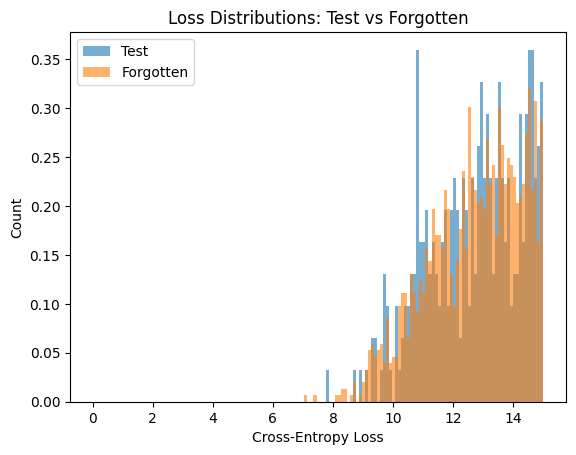

In [ ]:
from Final_Structure.evaluate import membership_inference_attack

# Example function call for the model before unlearning
retrain_mean_metrics, retrain_std_metrics = membership_inference_attack(
    retain_model,
    valid_forget_loader,
    train_forget_loader,
    device=DEVICE,
    seed=SEED,
    plot_dist=True
)

In [ ]:
print("Mean Metrics:\n", retrain_mean_metrics.to_string(), "\n")
print("Standard Deviation Metrics:\n", retrain_std_metrics.to_string())

Mean Metrics:
 TP     64.000000
TN     45.800000
FP     37.400000
FN     55.800000
TPR     0.533524
TNR     0.554699
PPV     0.631450
NPV     0.450883
FPR     0.445301
FNR     0.466476
FDR     0.368550
ACC     0.540887 

Standard Deviation Metrics:
 TP     8.602325
TN     5.540758
FP     9.016651
FN     5.761944
TPR    0.024429
TNR    0.051378
PPV    0.087397
NPV    0.055719
FPR    0.051378
FNR    0.024429
FDR    0.087397
ACC    0.033301


#### SCRUB

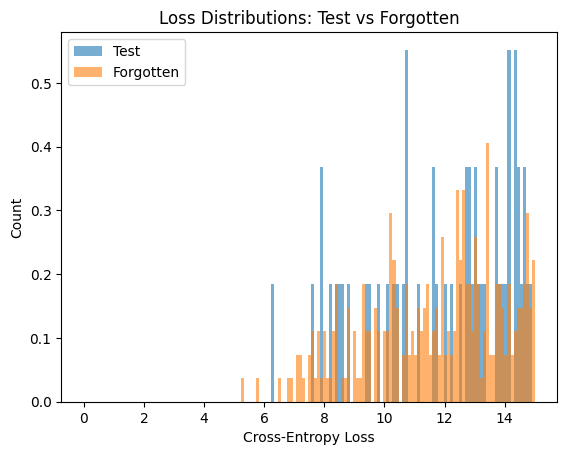

In [ ]:
from Final_Structure.evaluate import membership_inference_attack

# Example function call for the model before unlearning
scrub_mean_metrics, scrub_std_metrics = membership_inference_attack(
    scrub_model,
    valid_forget_loader,
    train_forget_loader,
    device=DEVICE,
    seed=SEED,
    plot_dist=True
)

In [ ]:
print("Mean Metrics:\n", scrub_mean_metrics.to_string(), "\n")
print("Standard Deviation Metrics:\n", scrub_std_metrics.to_string())

Mean Metrics:
 TP     57.200000
TN     47.000000
FP     44.200000
FN     54.600000
TPR     0.512268
TNR     0.514546
PPV     0.564123
NPV     0.462629
FPR     0.485454
FNR     0.487732
FDR     0.435877
ACC     0.513300 

Standard Deviation Metrics:
 TP     3.193744
TN     5.338539
FP     3.271085
FN     5.412947
TPR    0.027128
TNR    0.035111
PPV    0.031878
NPV    0.052672
FPR    0.035111
FNR    0.027128
FDR    0.031878
ACC    0.030446


#### Bad Teach

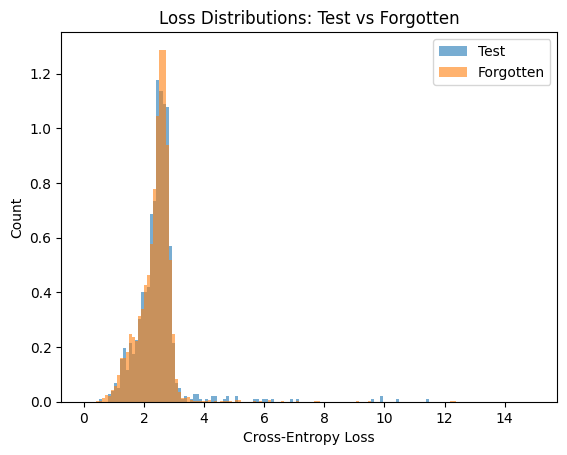

In [ ]:
from Final_Structure.evaluate import membership_inference_attack

# Example function call for the model before unlearning
badt_mean_metrics, badt_std_metrics = membership_inference_attack(
    badt_model,
    valid_forget_loader,
    train_forget_loader,
    device=DEVICE,
    seed=SEED,
    plot_dist=True
)

In [ ]:
print("Mean Metrics:\n", badt_mean_metrics.to_string(), "\n")
print("Standard Deviation Metrics:\n", badt_std_metrics.to_string())

Mean Metrics:
 TP     61.600000
TN     44.800000
FP     39.800000
FN     56.800000
TPR     0.520188
TNR     0.529781
PPV     0.607397
NPV     0.440846
FPR     0.470219
FNR     0.479812
FDR     0.392603
ACC     0.524138 

Standard Deviation Metrics:
 TP     5.029911
TN     4.711688
FP     4.764452
FN     4.438468
TPR    0.019185
TNR    0.028300
PPV    0.048082
NPV    0.045031
FPR    0.028300
FNR    0.019185
FDR    0.048082
ACC    0.022735


#### SSD

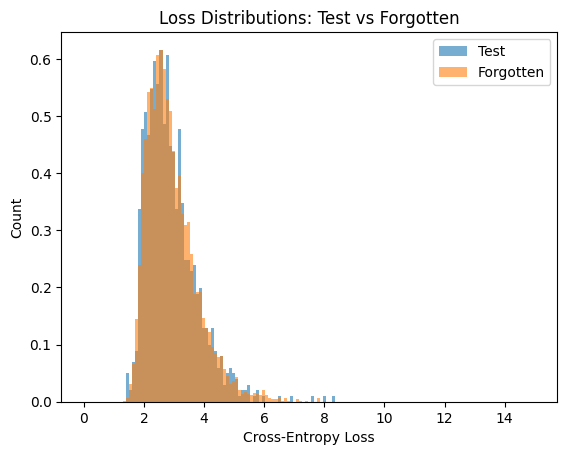

In [ ]:
from Final_Structure.evaluate import membership_inference_attack

# Example function call for the model before unlearning
ssd_mean_metrics, ssd_std_metrics = membership_inference_attack(
    ssd_model,
    test_forget_loader,
    train_forget_loader,
    device=DEVICE,
    seed=SEED,
    plot_dist=True
)

In [ ]:
print("Mean Metrics:\n", ssd_mean_metrics.to_string(), "\n")
print("Standard Deviation Metrics:\n", ssd_std_metrics.to_string())

Mean Metrics:
 TP     48.200000
TN     49.000000
FP     51.800000
FN     51.000000
TPR     0.486681
TNR     0.484756
PPV     0.482000
NPV     0.490000
FPR     0.515244
FNR     0.513319
FDR     0.518000
ACC     0.486000 

Standard Deviation Metrics:
 TP     8.228001
TN     9.617692
FP     8.228001
FN     9.617692
TPR    0.023486
TNR    0.019505
PPV    0.082280
NPV    0.096177
FPR    0.019505
FNR    0.023486
FDR    0.082280
ACC    0.020736
